In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Excercise 
generate a function that is not linear 

plot the analytical solution for the 1st derivative and the 2nd derivative

calculate the numerical 1st and 2nd order derivative

add to the plot

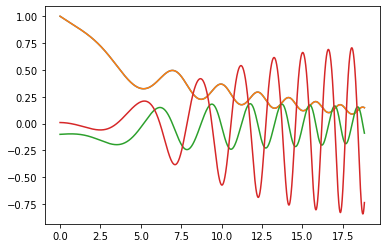

In [102]:
x = np.linspace(0,np.pi*6,10000)
function = np.cos(np.sin(x**2))
def Function(x):
    return np.cos(np.sin((x/4)**2))*np.exp(-x/10)
plt.plot(x,Function(x))
def DxFunction(x):
    return -(np.exp(-x/10)*(5*x*np.cos((x**2)/16)*np.sin(np.sin((x**2)/16))+4*np.cos(np.sin((x**2)/16))))/40
def Dx2Function(x):
    return (np.exp(-x/10)*((25*(x**2)*np.sin((x**2)/16)+(40*x-200)*np.cos((x**2)/16))*np.sin(np.sin((x**2)/16))
                          +(16-25*(x**2)*np.cos((x**2)/16)**2)*np.cos(np.sin((x**2)/16))))/1600

First_der  = -(np.exp(-x/10)*(5*x*np.cos((x**2)/16)*np.sin(np.sin((x**2)/16))+4*np.cos(np.sin((x**2)/16))))/40
Second_der = (np.exp(-x/10)*((25*(x**2)*np.sin((x**2)/16)+(40*x-200)*np.cos((x**2)/16))*np.sin(np.sin((x**2)/16))
                          +(16-25*(x**2)*np.cos((x**2)/16)**2)*np.cos(np.sin((x**2)/16))))/1600
plt.plot(x,Function(x))
plt.plot(x,DxFunction(x))
plt.plot(x,Dx2Function(x))

In [82]:
#These are the analytical functions

dfunction_a   = -2*x*np.cos(x**2)*np.sin(np.sin(x**2))
d2function_a  = (4*(x**2)*np.sin(x**2)-2*np.cos(x**2))*np.sin(np.sin(x**2))-4*(x**2)*(np.cos(x**2))**2*np.cos(np.sin(x**2))

In [113]:
# This should be the first order numerical scheme
dfunction_n = []
for index in range(1,len(x)-1):
    aux = (Function(x[index+1])-Function(x[index-1]))/((x[index+1]-x[index-1]))
    #print('this is index = '+str(index))
    #print('this is index -1 = '+str(index-1))
    #print('this is index +1 = '+str(index+1))
    dfunction_n.append(aux)
d2function_n = []
for index in range(1,len(x)-1):
    aux = (Function(x[index+1])+Function(x[index-1])-2*Function(x[index]))/((0.5*x[index+1]-0.5*x[index-1])**2)
    #print(aux)
    d2function_n.append(aux)
dx = x[1]-x[0]
print(dx)
d2function_num_2 = (Function(x[1:])+Function(x[:-1]))/(2*dx)
#for index in range(1,len(x)-1)

0.0018851441065645324


10000
9998
9999


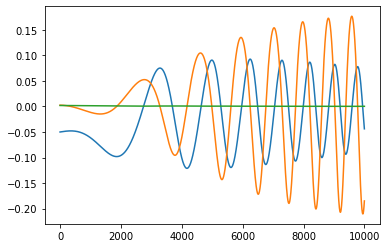

In [106]:
print(len(x))
print(len(dfunction_n))
print(len(d2function_num_2))
plt.plot(dfunction_n)
plt.plot(d2function_n)
plt.plot(d2function_num_2)

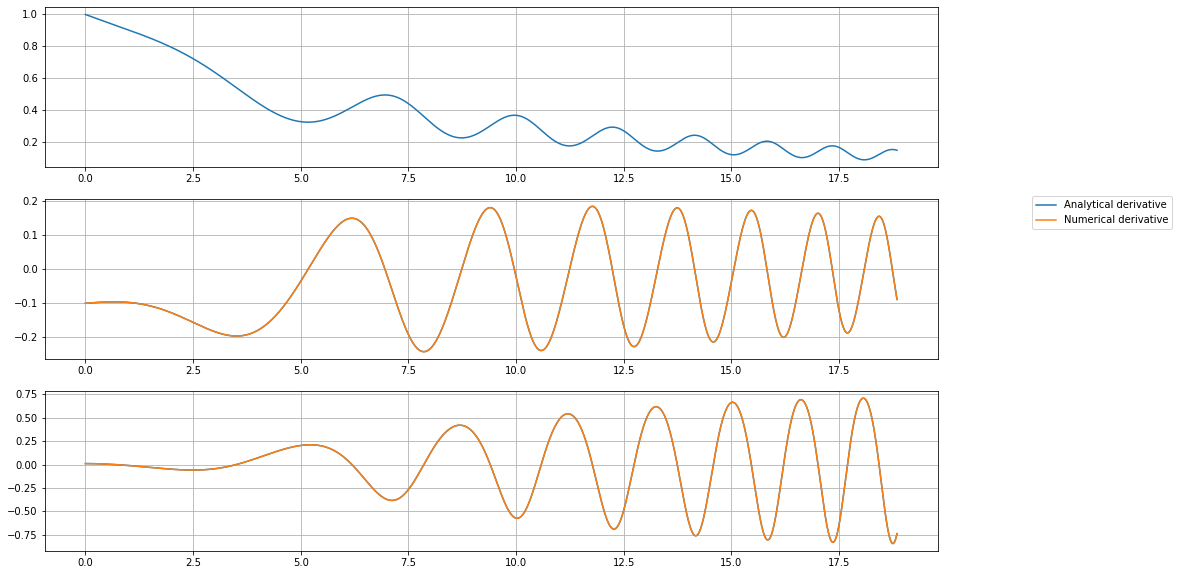

In [116]:
fig, (ax0,ax1,ax2) = plt.subplots(3,1,figsize=(16, 10))

ax0.plot(x,Function(x),label='Function',color = 'tab:blue')


#ax0.plot(x,function,label='Function',color = 'tab:blue')

#ax1.plot(x,dfunction_a,label='Analytical derivative', color = 'tab:blue')
ax1.plot(x,DxFunction(x),label='Analytical derivative', color = 'tab:blue')
ax1.plot(x[1:-1],dfunction_n,label='Numerical derivative',color = 'tab:orange')

#ax2.plot(x,d2function_a,label='Analytical second derivative',color = 'tab:blue')
ax2.plot(x,Dx2Function(x),label='Analytical second derivative',color = 'tab:blue')
ax2.plot(x[1:-1],d2function_n,label='Numerical second derivative',color = 'tab:orange')

ax1.legend(bbox_to_anchor=(1.1, 1.05))
#plt.xlabel('Wind Direction [deg]', fontsize=16)
#plt.ylabel('Number of Occurence', fontsize=16)
#plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
for ax in [ax0,ax1,ax2]:
    ax.grid()

# Assignment:

given a Temp profile return a density profile 

n_0        = 1e-19

Alt_0      = 100

Alt_n      = 500

num_points = 100

Earth_r    = 6370

gravity    = 3.99e14/((Earth_r+Alt)*1000)**2

T_0        = 200

T_n        = 1000   --> Temp is linear

m          = 28*1.67e-27

k          = 1.38e-23

### 1)make an Alt array

### 2) make a radius array

### 3) make a gravity array

### 4) make a Temp array

### 5) make a H array

In [158]:
n_0        = 1e19
Alt_0      = 100
Alt_n      = 500
num_points = 100
Earth_r    = 6370
#gravity    = 3.99e14/((Earth_r+Alt)*1000)**2
T_0        = 200
T_n        = 1000   #--> Temp is linear
m          = 28*1.67e-27
k          = 1.38e-23

def gravity(Alt):
    return 3.99e14/(((Earth_r+Alt)*1000)**2)
def Lin_temperature(Alt):
    return 2*Alt


In [247]:
Altitude = np.linspace(Alt_0,Alt_n,1000)
radius   = np.linspace(Earth_r+Alt_0,Earth_r+Alt_n,1000)
Gravity  = gravity(Altitude)
Temp     = Lin_temperature(Altitude)
#plt.plot(Temp,Altitude)
#print(Altitude)

2.0000000000000077e+18


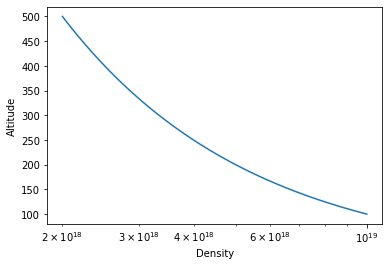

In [258]:
def Density(T,Gravity,Altitude,m,n_0):
    Dens      = [n_0]
    H         = []
    
    for i in range(1,len(T)):
        delta_alt = (Altitude[i]-Altitude[i-1])
        #print('This is delta alt '+str(delta_alt))
        H_a    = (k * ((T[i-1]+T[i])/2))/(m * 1.67e-27 * ((Gravity[i-1]+Gravity[i])/2))
        #print('this is H_a  '+str(H_a))
        H.append(H_a)
        #print('This is H  '+str(H))
        #print('This is Dens before doing shit '+str(Dens))
        aux = (T[i-1]/T[i])*Dens[i-1]*np.exp((-delta_alt*1000)/H_a)
        #print('this is aux  '+str(aux))
        Dens.append(aux)
        #print('This is Dens '+str(Dens))
        #print((T_0/T)*n_0*np.exp((-delta_alt)/H))
    return Dens , H
Thing=Density(Temp,Gravity,Altitude,m,n_0)
plt.semilogx(Thing[0],Altitude[:])
plt.xlabel('Density')
plt.ylabel('Altitude')
print(Thing[0][-1])

In [259]:
N2_Density = Density(Temp,Gravity,Altitude,28,n_0)
O2_Density = Density(Temp,Gravity,Altitude,32,0.3e19)
O_Density = Density(Temp,Gravity,Altitude,16,1e18)

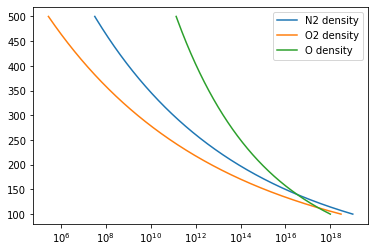

In [263]:
plt.semilogx(N2_Density[0],Altitude[:],label = 'N2 density')
plt.semilogx(O2_Density[0],Altitude[:],label = 'O2 density')
plt.semilogx(O_Density[0],Altitude[:],label = 'O density')
plt.legend()
